In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, img_as_ubyte
from scipy.signal import convolve2d as conv2
import scipy.ndimage
import skimage
import math


In [0]:
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab6/lab6.bmp
!ls

lab6.bmp  sample_data


# Part1

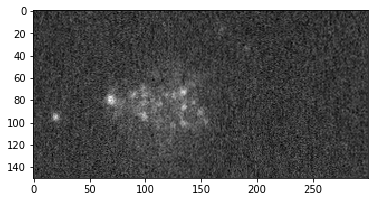

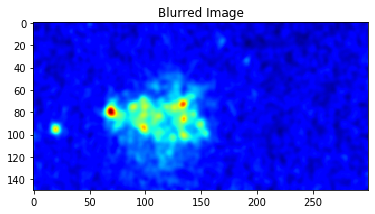

In [0]:
#  Create a Laplacian-of-Gaussian Volume
# steps 1-3
imfile = 'lab6.bmp' 
image = io.imread(imfile,True)
plt.imshow(image,cmap='gray')
plt.show()
g_img = filters.gaussian(image,sigma=2)  
plt.imshow(g_img,cmap='jet')
plt.title("Blurred Image")
plt.show()

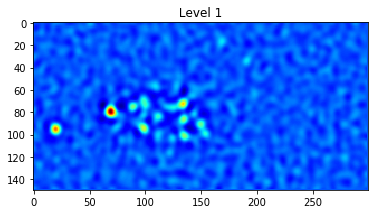

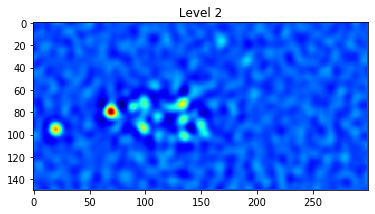

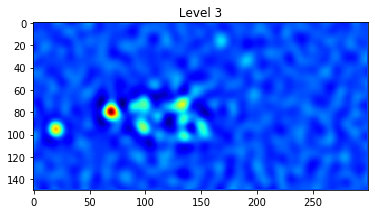

In [0]:
#steps 4 nd 5
level1 = filters.gaussian(g_img,sigma=3)  
i = int(2*round(3*3)+1)
level1 = filters.laplace(level1, ksize = i)
plt.imshow(level1,cmap='jet')
plt.title(" Level 1 ")
plt.show()
level2 = filters.gaussian(g_img,sigma=4)  
i = int(2*round(3*3)+1)
level2 = filters.laplace(level2, ksize = i)
plt.imshow(level2,cmap='jet')
plt.title(" Level 2 ")
plt.show()
level3 = filters.gaussian(g_img,sigma=5)  
i = int(2*round(3*3)+1)
level3 = filters.laplace(level3, ksize = i)
plt.imshow(level3,cmap='jet')
plt.title(" Level 3 ")
plt.show()
h = image.shape[0]
w = image.shape[1]
LOG = np.zeros((h,w,3),np.float64)
LOG[:,:,0] = level1
LOG[:,:,1] = level2
LOG[:,:,2] = level3

# Part2

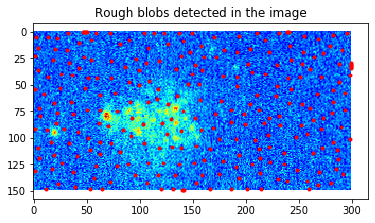

In [0]:
#Obtain a rough estimate of blob locations
lm =  scipy.ndimage.filters.minimum_filter(LOG,size=10)
msk = (LOG == lm)
B = np.sum(msk,axis = 2)
point = np.nonzero(B)
plt.imshow(image,cmap='jet')
plt.scatter(point[1],point[0],c = 'r',marker='.')
plt.title('Rough blobs detected in the image')
plt.show()

# Part3

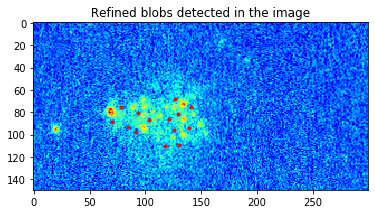

In [0]:
# Refine the blobs using Otsu thresholding
img_as_ubyte(g_img)
thresh = filters.threshold_otsu(g_img)
binary =np.multiply(B, g_img > thresh)
point2 = np.nonzero(binary)
plt.imshow(image,cmap='jet')
plt.scatter(point2[1], point2[0],c = 'r',marker='.')
plt.title(" Refined blobs detected in the image ")
plt.show()